In [24]:
import os

# visualization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

# tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [27]:
images = 'D:/indhu/Datasets/Riped and Unriped Tomato Dataset/Images'  # Directory with 'ripe' and 'unripe' folders
riped_images = []
unriped_images = []
for file_name in os.listdir(images):
    file_path = os.path.join(images,file_name)
    if file_name.endswith('jpeg'):
        if 'unriped' in file_name:
            unriped_images.append(file_path)
        else:
            riped_images.append(file_path)

print(len(riped_images))
print(len(unriped_images))

97
80


In [29]:
len(os.listdir(images))

177

In [35]:
riped_images[0]


'D:/indhu/Datasets/Riped and Unriped Tomato Dataset/Images\\riped_tomato_1.jpeg'

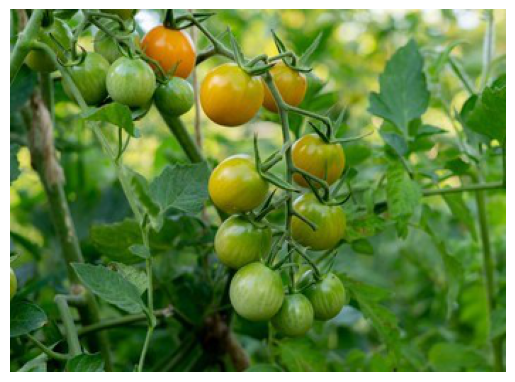

In [36]:
# Path to your image file
image_path = riped_images[0]

# Read the image
img = load_img(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes for better display
plt.show()

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array,array_to_img
import numpy as np
import os

# Define image dimensions
img_height = 150
img_width = 150

def preprocess_image(image_path, img_height, img_width):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

def load_and_preprocess_images(image_paths, img_height, img_width):
    images = [preprocess_image(img_path, img_height, img_width) for img_path in image_paths]
    return np.array(images)

# Load and preprocess images
riped_images_processed = load_and_preprocess_images(riped_images, img_height, img_width)
unriped_images_processed = load_and_preprocess_images(unriped_images, img_height, img_width)

# Create labels
riped_labels = np.ones(len(riped_images))
unriped_labels = np.zeros(len(unriped_images))

# Combine datasets
X = np.concatenate((riped_images_processed, unriped_images_processed), axis=0)
y = np.concatenate((riped_labels, unriped_labels), axis=0)

In [60]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=1000).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [59]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.5798 - loss: 4.1027 - val_accuracy: 0.5556 - val_loss: 10.3455
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.6340 - loss: 9.0983 - val_accuracy: 0.5000 - val_loss: 4.8660
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.6571 - loss: 3.2289 - val_accuracy: 0.8333 - val_loss: 0.4264
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.8523 - loss: 0.6709 - val_accuracy: 0.9722 - val_loss: 0.1405
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.9219 - loss: 0.2484 - val_accuracy: 0.9722 - val_loss: 0.0775
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9578 - loss: 0.1327 - val_accuracy: 0.9722 - val_loss: 0.0635
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9574 - loss: 0.1508 - val_accuracy: 0.9722 - val_loss: 0.0747
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.9505 - loss: 0.0856 - val_accuracy: 0.9722 - val_loss

In [62]:
val_loss, val_accuracy = model.evaluate(val_dataset,return_dict=True).values()
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
model.evaluate(val_dataset,return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9711 - loss: 0.0609
Validation Loss: 0.9722222089767456
Validation Accuracy: 0.058616235852241516
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9711 - loss: 0.0609


{'accuracy': 0.9722222089767456, 'loss': 0.058616235852241516}

In [52]:
def show_image_and_predict_from_array(model, val_image_index):
    image_array = X_val[val_image_index]
    # Ensure the image is in the correct shape and normalized
    if image_array.ndim == 3:
        image_array = np.expand_dims(image_array, axis=0)
    if image_array.max() > 1.0:
        image_array = image_array / 255.0

    # Predict the label
    prediction = model.predict(image_array)
    label = 'Ripe' if prediction[0] > 0.5 else 'Unripe'
    target_label = 'Ripe' if y_val[val_image_index] > 0.5 else 'Unripe'

    # Display the image and print the prediction
    plt.imshow(image_array[0])
    plt.title(f'Predicted: {label}')
    plt.axis('off')
    plt.show()
    print(f'Target label: {target_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


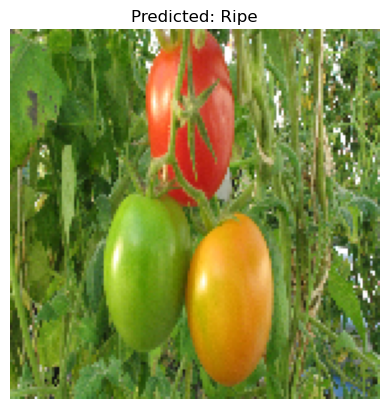

Target label: Ripe


In [53]:
for index in range(len(X_val)):
    show_image_and_predict_from_array(model, index)
    print("==========================================")
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


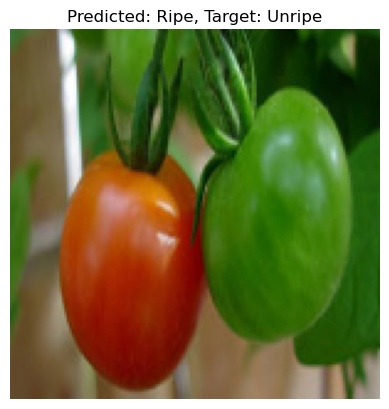

Predicted label: Ripe
Target label: Unripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [54]:
def show_wrong_predictions(model, X_val, y_val):
    # Iterate through the validation set
    for i in range(len(X_val)):
        image_array = X_val[i]
        true_label = y_val[i]

        # Ensure the image is in the correct shape and normalized
        if image_array.ndim == 3:
            image_array = np.expand_dims(image_array, axis=0)
        if image_array.max() > 1.0:
            image_array = image_array / 255.0

        # Predict the label
        prediction = model.predict(image_array)
        predicted_label = 1 if prediction[0] > 0.5 else 0

        # Check if the prediction is wrong
        if predicted_label != true_label:
            # Convert labels to string
            predicted_label_str = 'Ripe' if predicted_label == 1 else 'Unripe'
            true_label_str = 'Ripe' if true_label == 1 else 'Unripe'

            # Display the image and print the prediction
            plt.imshow(image_array[0])
            plt.title(f'Predicted: {predicted_label_str}, Target: {true_label_str}')
            plt.axis('off')
            plt.show()
            print(f'Predicted label: {predicted_label_str}')
            print(f'Target label: {true_label_str}')

# Example usage
show_wrong_predictions(model, X_val, y_val)

In [63]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'D:/indhu/Datasets/Riped and Unriped Tomato Dataset/Images/riped_tomato_86.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = prediction(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Unripe Tomato'
else:
  prediction = 'Ripe Tomato'

NameError: name 'prediction' is not defined

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'D:/indhu/Datasets/Riped and Unriped Tomato Dataset/Images',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = train_datagen.flow_from_directory(r'D:/indhu/Datasets/Riped and Unriped Tomato Dataset/Images',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [7]:

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(df, 
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')  # Ripe or unripe -> binary classification

test_generator = test_datagen.flow_from_directory(df, 
                                                target_size=(150, 150), 
                                                batch_size=32, 
                                                class_mode='binary')

Found 177 images belonging to 2 classes.
Found 177 images belonging to 2 classes.


In [16]:
# Get predictions from the validation set
val_images, val_labels = next(test_generator)  # Fetch a batch of validation images
predictions = model.predict(val_images)
predictions = (predictions > 0.5).astype(int)  # Convert predictions to binary

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


In [18]:
loss, accuracy = model.evaluate(test_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 763ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 100.00%


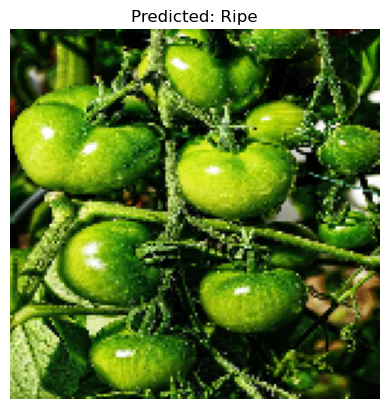

Model's prediction for the selected image: Ripe


In [19]:
# Loop through and display results for a random image from validation
img = random.randint(0, len(val_images) - 1)
plt.imshow(val_images[img])  # Show image
plt.title(f"Predicted: {'Ripe' if predictions[img][0] >= 0 else 'Unripe'}")
plt.axis('off')
plt.show()
print(f"Model's prediction for the selected image: {'Ripe' if predictions[img][0] >= 0 else 'Unripe'}")

In [22]:
show_image(unriped_images[50])

NameError: name 'show_image' is not defined